In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['bank-additional-names.txt', 'bank-additional-full.csv']


Підключіть необхідні бібліотеки.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)}); 

Завантажте дані. Вони знаходяться у директорії input.

In [3]:
df = pd.read_csv("../input/bank-additional-full.csv", sep=";")

Який середній вік неодружених клієнтів?

In [4]:

df[df["marital"] != "married"]["age"].mean()

36.523862238622385

In [5]:
# df["y"] = df["y"].map({"yes" : 1, "no" : 0})
# df["marital"] = df["marital"].map({"married" : 2, "single": 1, "divorced" : 0, "unknown" : -1})

В який день тижня (ознака **day_of_week**) найчастіше дзвонили клієнтам, які відмовилися від депозиту?

In [6]:
df[df["y"] == "no"]["day_of_week"].value_counts().nlargest(1)

mon    7667
Name: day_of_week, dtype: int64

Побудуйте інфографіку за ознаками **marital** та **y**. Які висновки можна зробити?

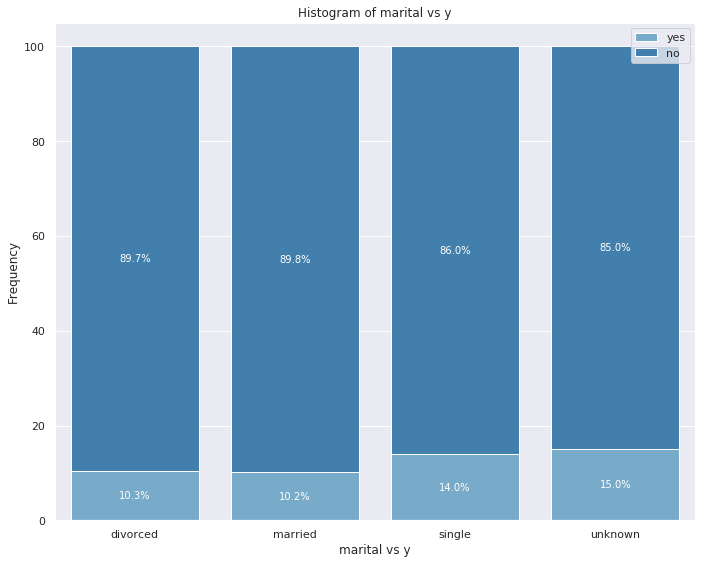

In [7]:
cross_tab = pd.crosstab(df['marital'], df['y'], normalize='index') * 100
sns.barplot(data=cross_tab.reset_index(), x='marital', y='yes', label='yes', color='#6BAED6')
ax = sns.barplot(data=cross_tab.reset_index(), x='marital', y='no', label='no', color="#3182BD", bottom=cross_tab['yes'])

# Add percentage labels to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')
plt.title(f'Histogram of marital vs y')
plt.xlabel("marital vs y")
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()  # Adjust subplot spacing
plt.show()

Бачимо, що неодружені і неразведені клієнти частіше оформляли довгостроковий депозит

Чи є зв'язок між наявністю кредиту (**default**) у клієнта та результатом? Побудуйте інфографіку.

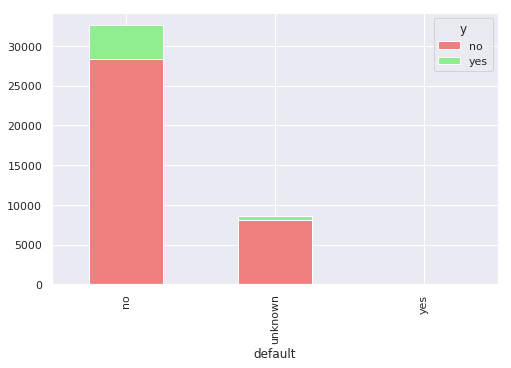

In [8]:
cross_tab = pd.crosstab(df['default'], df['y'])

cross_tab.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], figsize=(8, 5))

Візуалізуйте інформацію про рівень освіти залежно від середнього віку. Чи є статистично значущим взаємозв'язок між ними?

Так як рівень освіти є ординальною зміною, для того щоб знайти кореляцію, можна перевести його у числа

In [9]:
df["education"].value_counts()


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
education_mapping = {
    'university.degree': 1,
    'high.school': 2,
    'basic.9y': 3,
    'professional.course': 4,
    'basic.4y': 5,
    'basic.6y': 6,
    'unknown': 7,
    'illiterate': 8
}
df['education_numeric'] = df['education'].map(education_mapping)

Кореляція Пірсона: 0.1828270260191998
P-значення: 1.911573954880501e-306


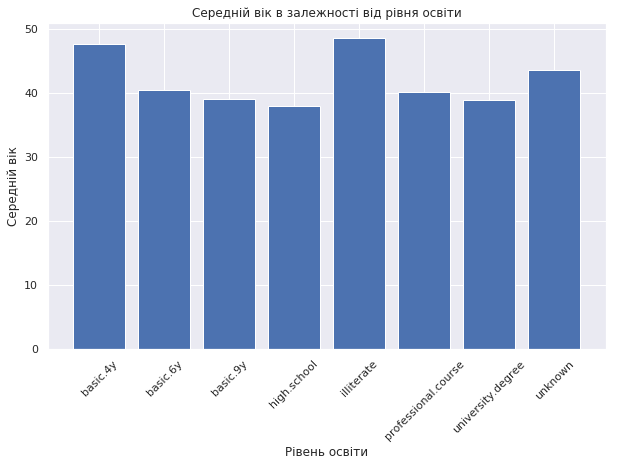

In [11]:
from scipy.stats import pearsonr  # Для кореляції Пірсона

# Припустимо, що df - ваш DataFrame з даними, де "age" - вік, "education" - рівень освіти

# Групуємо дані за рівнем освіти і обчислюємо середній вік для кожної групи
education_age_mean = df.groupby("education")["age"].mean().reset_index()

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.bar(education_age_mean["education"], education_age_mean["age"])
plt.xlabel("Рівень освіти")
plt.ylabel("Середній вік")
plt.title("Середній вік в залежності від рівня освіти")
plt.xticks(rotation=45)

# Визначення статистичного взаємозв'язку (кореляція Пірсона)
correlation, p_value = pearsonr(df["age"], df["education_numeric"])
print(f"Кореляція Пірсона: {correlation}")
print(f"P-значення: {p_value}")

plt.show()


P-значення, яке дуже близьке до нуля, наприклад, 1.911573954880501e-306, свідчить про дуже високу статистичну значущість. У цьому випадку, P-значення надзвичайно мале, що означає, що спостережене явище (або різниця між групами) є дуже надійним і майже не може бути пояснене випадковими факторами.

Що можна сказати про зв'язок між тривалістю контакту (ознака **duration**) та віком клієнта? Знайдіть коефіцієнт кореляції.

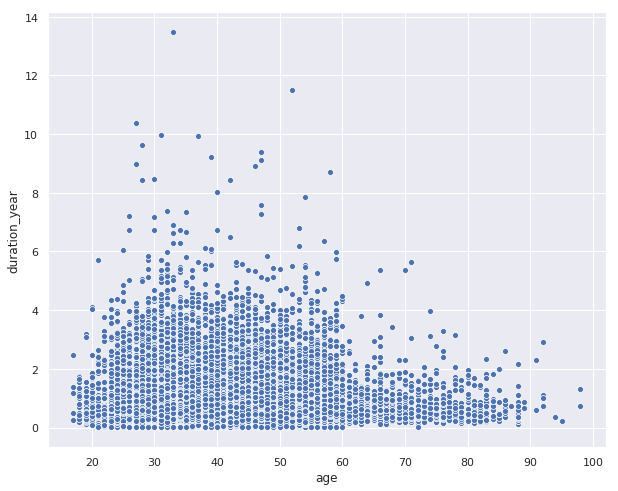

In [12]:
df["duration_year"] = df["duration"] / 365
sns.scatterplot(data=df, x="age", y="duration_year")


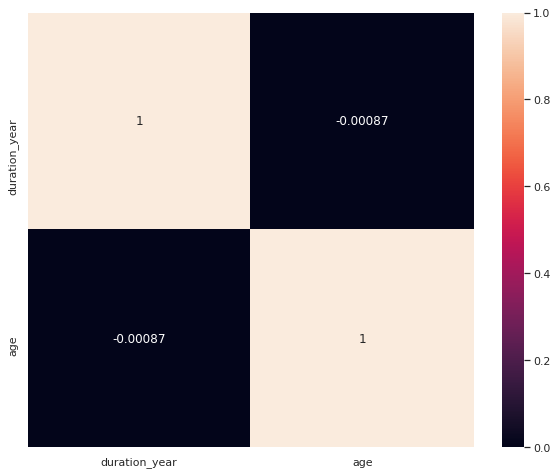

In [13]:
sns.heatmap(df[["duration_year", "age"]].corr(), annot=True)

З цих двох графіків можна зробити висновок, що зв'язку між віком та тривалістю контракту немає

Як пов'язані ознаки **education** та **housing**?

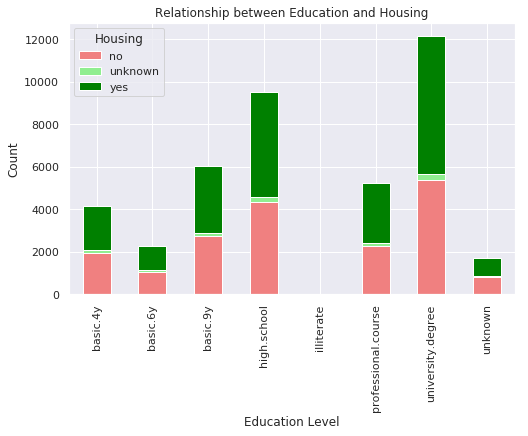

In [14]:
cross_tab = pd.crosstab(df['education'], df['housing'])

# Plot a stacked bar chart to visualize the relationship
cross_tab.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen', "green"], figsize=(8, 5))

plt.title('Relationship between Education and Housing')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Housing')

plt.show()

Робимо висновок, що люди які завершили школу або вищий навчальний заклад, у більшості, вже мають дом або квартиру

Давайте знайдемо, люди якого фаху частіше отримують long term deposit

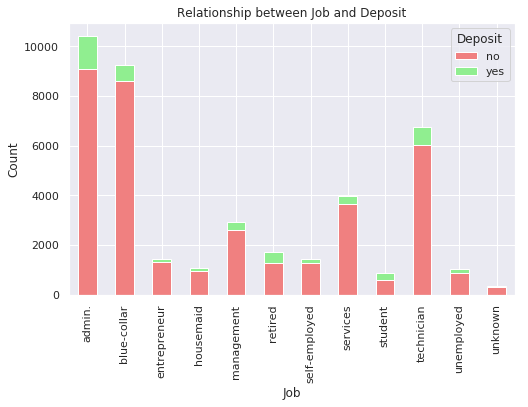

In [15]:
cross_tab = pd.crosstab(df['job'], df['y'])

# Plot a stacked bar chart to visualize the relationship
cross_tab.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], figsize=(8, 5))

plt.title('Relationship between Job and Deposit')
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Deposit')

plt.show()

З цього графіку бачимо, більше за інших, депозити отримують admin, blue-collar, technician

А тепер давайте подивимося на те, як пов'язані education та loan

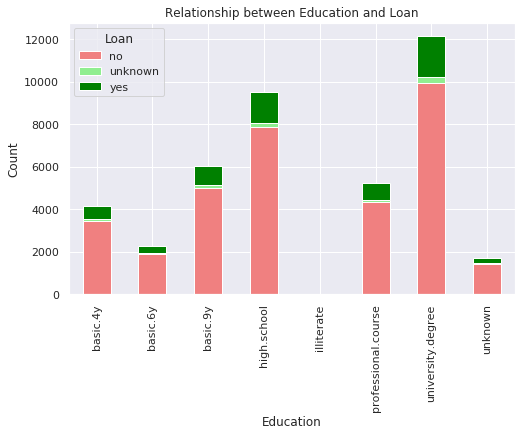

In [16]:
cross_tab = pd.crosstab(df['education'], df['loan'])

# Plot a stacked bar chart to visualize the relationship
cross_tab.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen', 'green'], figsize=(8, 5))

plt.title('Relationship between Education and Loan')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Loan')

plt.show()

З цього графіку бачимо, що люди які закінчили вищий навчальний заклад, частіше брали позику